In [277]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [278]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [279]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [280]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [281]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [282]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [283]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

In [284]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [285]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

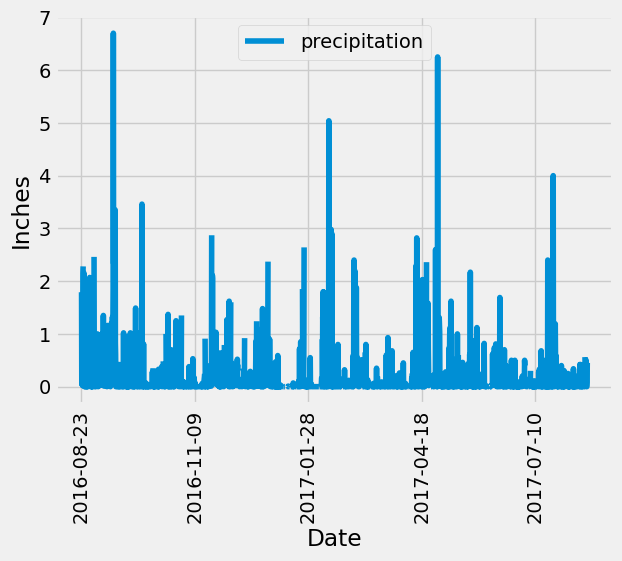

In [286]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results, columns= ["date", "precipitation"])

# Sort the dataframe by date
results_df = results_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(x = "date", y = "precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [287]:
# Use Pandas to calculate the summary statistics for the precipitation data

results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [288]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.id)).all()

[(9,)]

In [289]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
actstat = [measurement.station,func.count(measurement.id)]
activestations = session.query(*actstat).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [290]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
actstat = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
mostactivestationdata = session.query(*actstat).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
mostactivestationdata

(54.0, 85.0, 71.66378066378067)

Text(0.5, 0, 'Temperature')

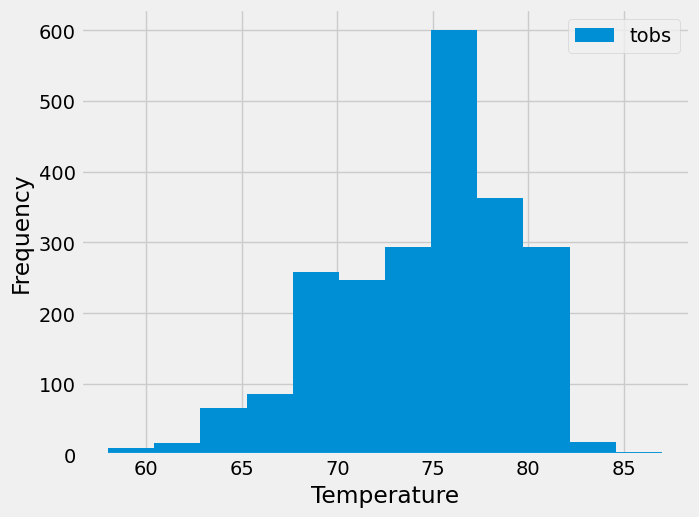

In [235]:
final_date_active_station = session.query(measurement.date)\
    .filter(measurement.station == 'USC00519281')\
    .order_by(measurement.date.desc())\
    .first().date

last_12_months = dt.datetime.strptime(final_date_active_station, '%Y-%m-%d') - dt.timedelta(days=365)

temperature_results = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= last_12_months).all()

temperature_df = pd.DataFrame(temperature_results, columns=["date", "temperature"])

plt.figure(figsize=(7, 5.5))
plt.hist(temperature_df['temperature'], bins=12, label='tobs')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Temperature')

In [212]:
final_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date

last_12_months = dt.datetime.strptime(final_date, '%Y-%m-%d') - dt.timedelta(days=365)

last_12_months

# temperature_results = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
#     filter(measurement.date >= last_12_months).all()

# temperature_results_df = pd.DataFrame(data=temperature_results, columns=["date", "tobs"])
# temperature_results_df = temperature_results_df.set_index('date', drop=True)

datetime.datetime(2016, 8, 23, 0, 0)

In [196]:
final_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date

last_12_months = dt.datetime.strptime(final_date, '%Y-%m-%d') - dt.timedelta(days=365)

temperature_results = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= last_12_months).all()

temperature_results

temperature_df = pd.DataFrame(temperature_results, columns=["date", "temperature"])

plt.figure(figsize=(7, 5.5))
plt.hist(temperature_df['temperature'], bins=12, label='tobs')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Temperature')

# df_2 = pd.DataFrame(temperature_results, columns = ['tobs'])
# df_2.plot.hist(bins=12)
# plt.tight_layout()

[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


Text(0.5, 4.183333333333314, 'Temperature')

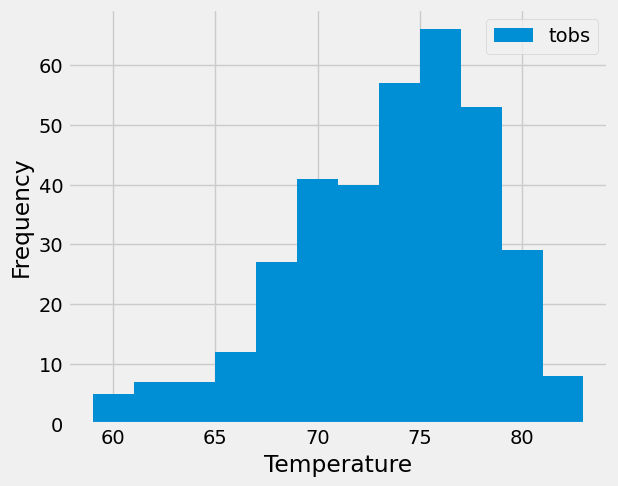

In [300]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_id = 'USC00519281'

previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

temperature_results = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    filter(measurement.date >= previous_year).all()

temperature_df = pd.DataFrame(temperature_results, columns=["date", "tobs"])

# plt.figure(figsize=(7, 5.5))
temperature_df.plot.hist(bins=12, label='tobs')
plt.legend()
plt.ylabel('Frequency')
plt.tight_layout()
plt.xlabel('Temperature')


# plt.show()

# most_active_station_id = activestations[0][0]

# Close Session

In [48]:
# Close Session
session.close()